In [ ]:
0. Описать задачу словами
+ 1. Прочитать данные
+ 2. Визуализировать данные и вычислить основные характеристики (среднее, разброс, корреляционную матрицу и т.д.). Интерпретировать.
+3. Обработать пропущенные значения (или убедиться, что их нет)
+4. Обработать категориальные признаки
5. Провести нормализацию (или объяснить, почему в вашем случае она не нужна)
+6. Разбить данные на обучающую и тестовую выборки
+7. Запустить классификатор (регрессию) ближайших соседей или другой (аргументировать свой выбор)
+8. Подобрать оптимальное значение к-ва ближайших соседей (или другого релевантного гиперпараметра) 
+9. Вычислить ошибки на обучающей и тестовой выборках. Сделать выводы 
10. По желанию: запустить другие классификаторы. Сравнить результаты
11. По желанию: как-то побороться с несбалансированностью классов (если она есть)
12. По желанию: исключить коррелированные переменные (объяснить зачем)
13. Сделать общие выводы

In [4]:
import numpy as np              # Массивы (матрицы, векторы, линейная алгебра)
import matplotlib.pyplot as plt # Научная графика
%matplotlib inline 
    # Говорим jupyter'у, чтобы весь графический вывод был в браузере, а не в отдельном окне
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import seaborn as sns           # Еще больше красивой графики для визуализации данных
import sklearn                  # Алгоритмы машинного обучения
import json

In [5]:
url = "https://raw.githubusercontent.com/Dobrynia100/ML-GameRecommend/main/games.csv"
game_raw = pd.read_csv(url)

In [6]:
url = "https://raw.githubusercontent.com/Dobrynia100/ML-GameRecommend/main/games_metadata.json"
metadata_raw = pd.read_json(url, lines=True)

In [7]:
game_raw.shape

(50796, 13)

In [8]:
metadata_raw.shape

(50796, 3)

In [9]:
game_raw.head()

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
0,13500,Prince of Persia: Warrior Within™,2008-11-21,True,False,False,Very Positive,84,2199,9.99,9.99,0.0,True
1,22364,BRINK: Agents of Change,2011-08-03,True,False,False,Positive,85,21,2.99,2.99,0.0,True
2,113020,Monaco: What's Yours Is Mine,2013-04-24,True,True,True,Very Positive,92,3722,14.99,14.99,0.0,True
3,226560,Escape Dead Island,2014-11-18,True,False,False,Mixed,61,873,14.99,14.99,0.0,True
4,249050,Dungeon of the ENDLESS™,2014-10-27,True,True,False,Very Positive,88,8784,11.99,11.99,0.0,True


In [17]:
metadata_raw.head()

,app_id,description,tags
0,13500,Enter the dark underworld of Prince of Persia ...,"[Action, Adventure, Parkour, Third Person, Gre..."
1,22364,,[Action]
2,113020,Monaco: What's Yours Is Mine is a single playe...,"[Co-op, Stealth, Indie, Heist, Local Co-Op, St..."
3,226560,Escape Dead Island is a Survival-Mystery adven...,"[Zombies, Adventure, Survival, Action, Third P..."
4,249050,Dungeon of the Endless is a Rogue-Like Dungeon...,"[Roguelike, Strategy, Tower Defense, Pixel Gra..."


In [10]:
game_raw.isna().sum()

app_id            0
title             0
date_release      0
win               0
mac               0
linux             0
rating            0
positive_ratio    0
user_reviews      0
price_final       0
price_original    0
discount          0
steam_deck        0
dtype: int64

In [11]:
metadata_raw.isna().sum()

app_id         0
description    0
tags           0
dtype: int64

In [12]:
game_raw[["positive_ratio", "user_reviews", "price_final", "discount"]].describe(percentiles=[.1, .25, .5, .75, .9]).round(2).T

,count,mean,std,min,10%,25%,50%,75%,90%,max
positive_ratio,50796.0,77.05,18.26,0.0,51.0,67.00,81.00,91.00,96.00,100.00
user_reviews,50796.0,1826.49,40103.43,10.0,12.0,19.00,48.00,206.00,1089.00,7494460.00
price_final,50796.0,8.60,11.50,0.0,0.0,0.99,4.99,10.99,19.99,299.99
discount,50796.0,5.60,18.62,0.0,0.0,0.00,0.00,0.00,0.00,90.00


In [13]:
game_raw['positive_ratio'].mode()

0    100
Name: positive_ratio, dtype: int64

In [14]:
game_raw['user_reviews'].mode()

0    10
Name: user_reviews, dtype: int64

In [15]:
game_raw['positive_ratio'].mean()

77.0512048192771

In [16]:
game_raw['user_reviews'].mean()

1826.4934640522877

In [17]:
game_raw.columns

Index(['app_id', 'title', 'date_release', 'win', 'mac', 'linux', 'rating',
       'positive_ratio', 'user_reviews', 'price_final', 'price_original',
       'discount', 'steam_deck'],
      dtype='object')

In [18]:
game_raw['rating'].dtype

dtype('O')

In [19]:
game_raw['rating']=game_raw['rating'].astype('category')


In [20]:
game_raw['rating'].dtype

CategoricalDtype(categories=['Mixed', 'Mostly Negative', 'Mostly Positive', 'Negative',
                  'Overwhelmingly Negative', 'Overwhelmingly Positive',
                  'Positive', 'Very Negative', 'Very Positive'],
, ordered=False)

In [ ]:
место для нормализации?

In [33]:
#game_stand = (game_raw - game_raw.mean(axis = 0))/game_raw.std(axis = 0) не работает

In [21]:
Building_dummies = pd.get_dummies(game_raw['rating'])

In [22]:
Building_dummies.head()

,Mixed,Mostly Negative,Mostly Positive,Negative,Overwhelmingly Negative,Overwhelmingly Positive,Positive,Very Negative,Very Positive
0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1


In [23]:
X=game_raw.drop(['rating', 'title','app_id','date_release'], axis=1)
y = game_raw['rating']

In [39]:
X

,win,mac,linux,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
0,True,False,False,84,2199,9.99,9.99,0.0,True
1,True,False,False,85,21,2.99,2.99,0.0,True
2,True,True,True,92,3722,14.99,14.99,0.0,True
3,True,False,False,61,873,14.99,14.99,0.0,True
4,True,True,False,88,8784,11.99,11.99,0.0,True
...,...,...,...,...,...,...,...,...,...
50791,True,False,False,55,4473,70.00,0.00,0.0,True
50792,True,False,False,65,351,50.00,0.00,0.0,True
50793,True,False,False,96,101,22.00,0.00,0.0,True
50794,True,False,False,38,29458,40.00,0.00,0.0,True


In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

N_train, N_test

(38097, 12699)

In [26]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [27]:
y_test_predict = knn.predict(X_test)
err_test  = np.mean(y_test  != y_test_predict)

In [28]:
err_test

0.08835341365461848

In [41]:
from sklearn.metrics import confusion_matrix
CM=confusion_matrix(y_test, y_test_predict)
print(CM)

[[2796    2  119    0    0    2    1    0   85]
 [  76  403    0    0    0    0    0    0    4]
 [  78    0 1823    0    0    7   11    0  284]
 [   1   11    0   76    0    0    0    0    0]
 [   1    0    0    0    0    0    0    0    0]
 [   1    0    1    0    0   26    0    0  260]
 [   0    0    8    0    0    0 3377    0    7]
 [   0   10    0    0    0    0    0    5    0]
 [   2    0   90    0    0   42   19    0 3071]]


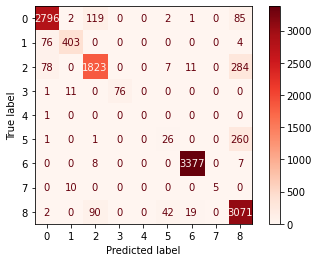

In [46]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(CM).plot(cmap='Reds')
pass

In [31]:
# Долго!
from sklearn.model_selection import GridSearchCV
nnb = [1, 3, 5, 10, 15, 20, 25, 35, 45, 55]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.0848887046772081 1


In [32]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

0.0 0.08788093550673282


In [36]:
1-knn.score(X_train, y_train)

0.0